Open the categorical dataframe we created before.

Plot all the categorical variables with the proper plot. What can you see?

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Make any changes you feel are necessary.

Plot time variable. Can you extract something from it?

The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
categorical = pd.read_csv("C:\Ironhack\Week4\Day1\lab-cleaning-numerical-data\categorical.csv")

In [6]:
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-24
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011-01-31
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize,2011-01-20
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011-02-10
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011-02-12
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011-02-06
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large,2011-02-03


In [7]:
def plot(dataframe):
    
    for column in dataframe.columns:
        dataframe[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Chart for {column}')
        plt.show()
    

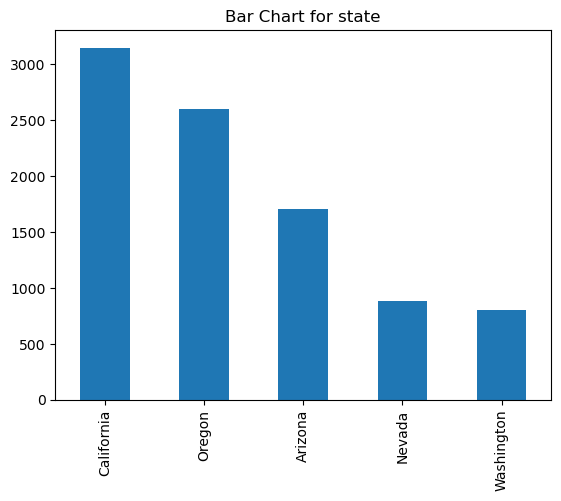

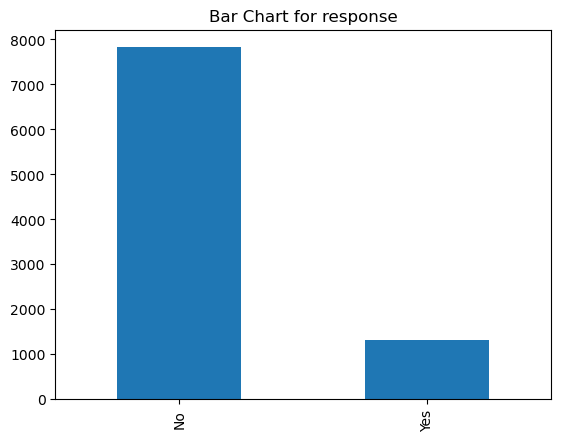

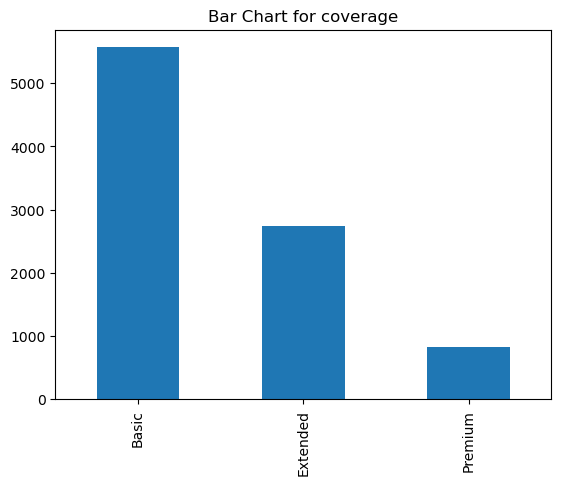

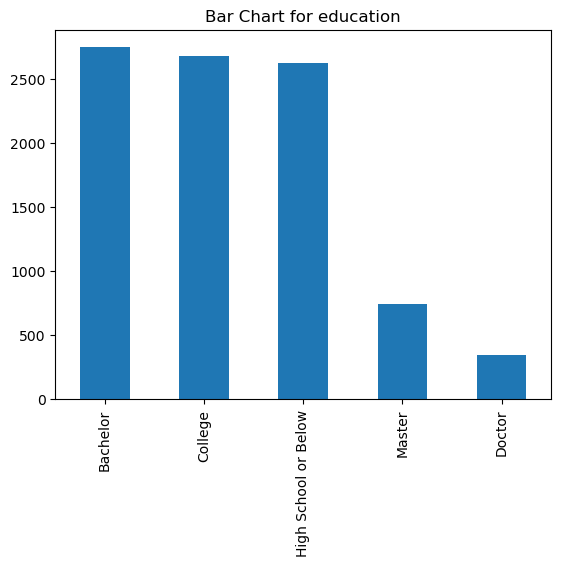

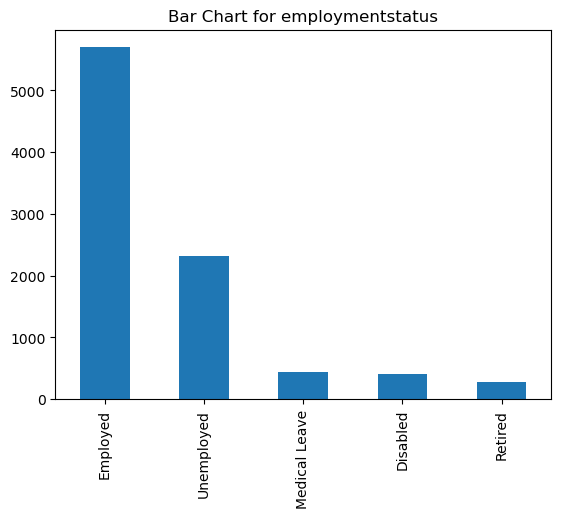

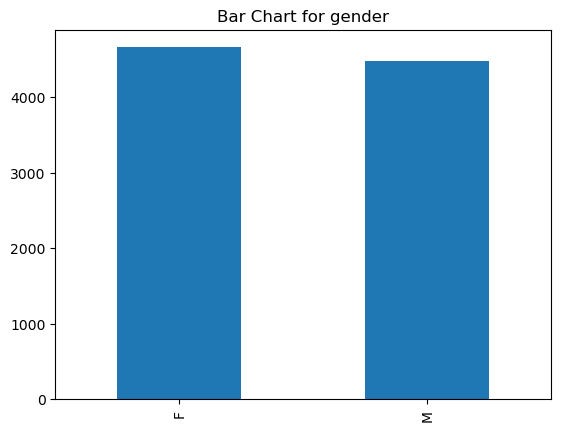

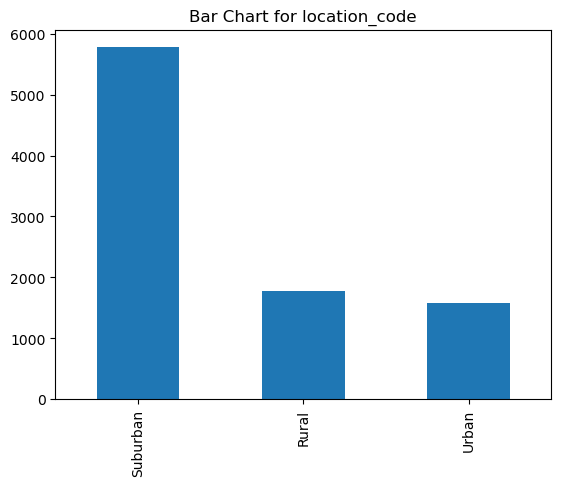

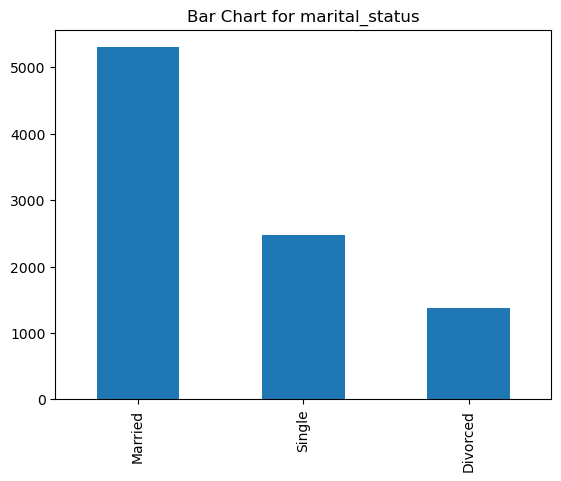

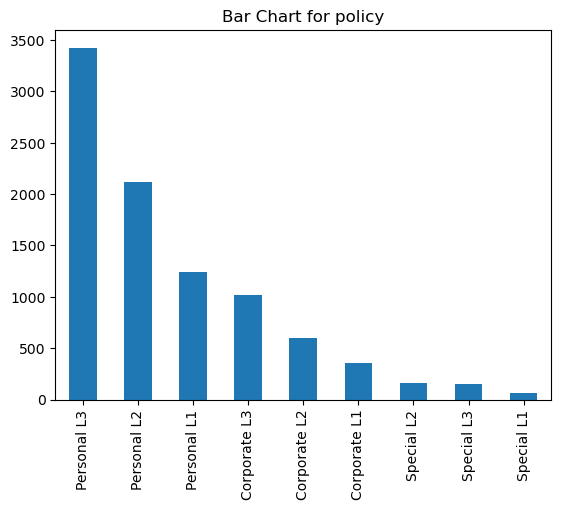

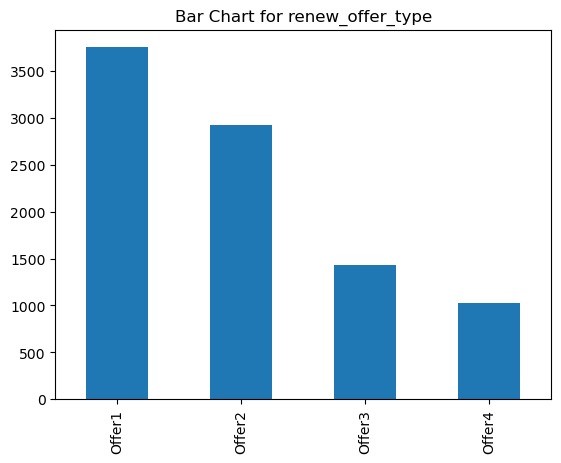

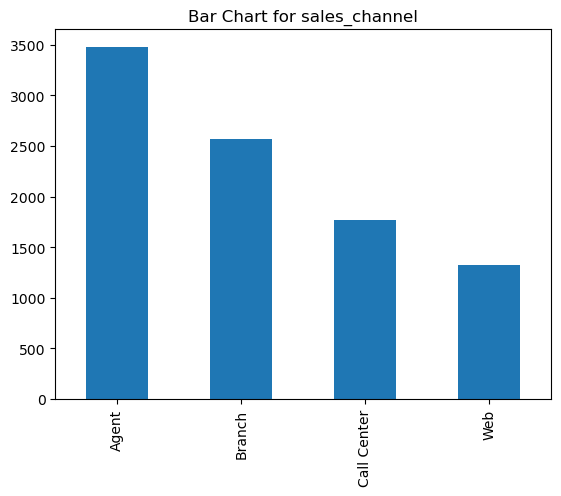

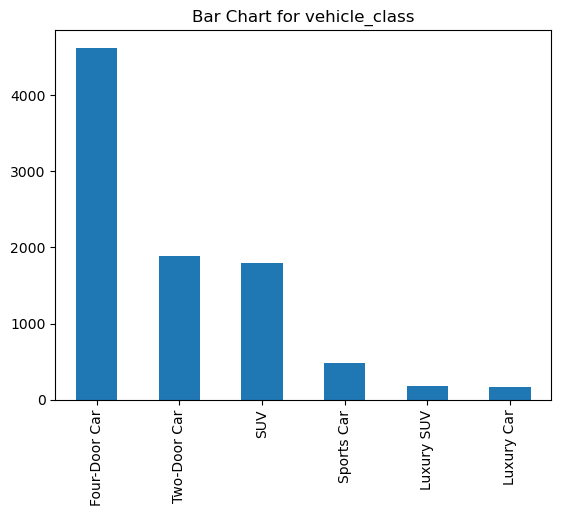

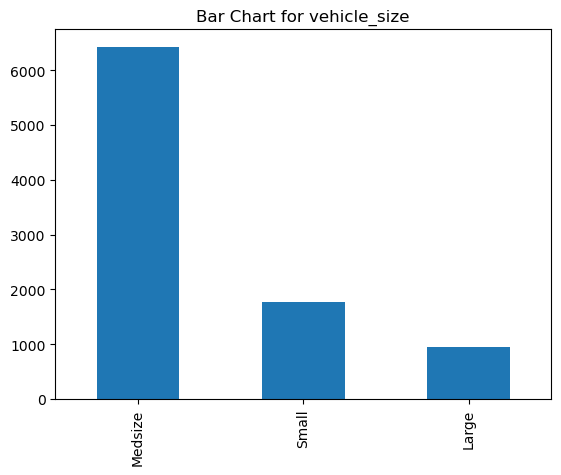

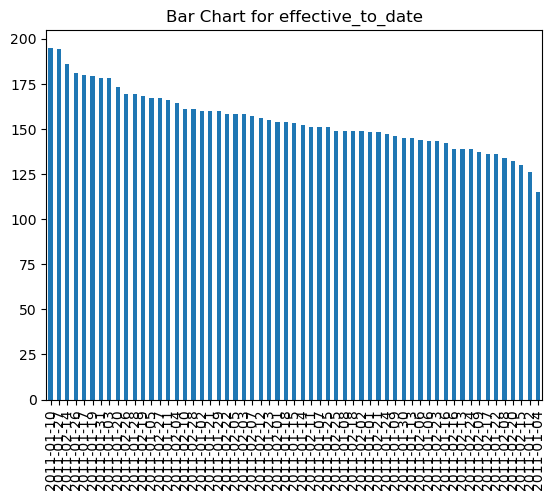

In [8]:
plot(categorical)

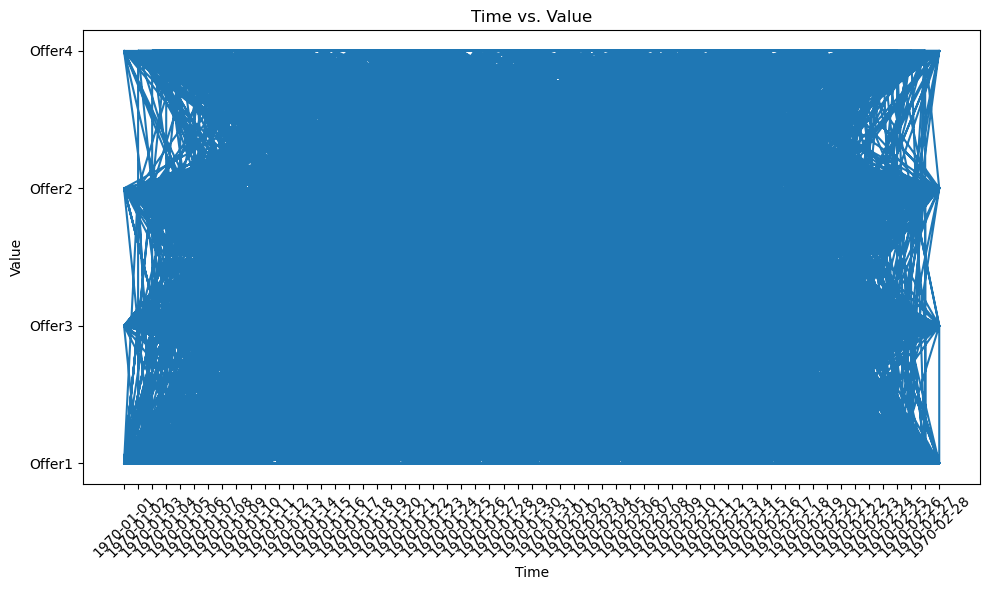

In [9]:
time_data=categorical['effective_to_date']
data=categorical['renew_offer_type']

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(time_data,data)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time vs. Value")

# Format the x-axis to display time
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m-%d"))

plt.tight_layout()
plt.show()


In [10]:
# Extract year, month, and day

categorical['effective_to_date'] = pd.to_datetime(categorical['effective_to_date'])

date=pd.DataFrame()

date['year'] = categorical['effective_to_date'].dt.year
date['month'] = categorical['effective_to_date'].dt.strftime('%B')
date['weekday'] = categorical['effective_to_date'].dt.strftime('%A')

In [11]:
date

,year,month,weekday
0,2011,February,Thursday
1,2011,January,Monday
2,2011,February,Saturday
3,2011,January,Thursday
4,2011,February,Thursday
...,...,...,...
9129,2011,February,Thursday
9130,2011,February,Saturday
9131,2011,February,Sunday
9132,2011,February,Thursday


In [12]:
cat_v2= pd.concat([categorical,date], axis=1)

In [13]:
cat_v2

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,year,month,weekday
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-24,2011,February,Thursday
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011-01-31,2011,January,Monday
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-19,2011,February,Saturday
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize,2011-01-20,2011,January,Thursday
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03,2011,February,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011-02-10,2011,February,Thursday
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011-02-12,2011,February,Saturday
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011-02-06,2011,February,Sunday
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large,2011-02-03,2011,February,Thursday


In [14]:
cat_v2.to_csv('categorical.csv', index=False)

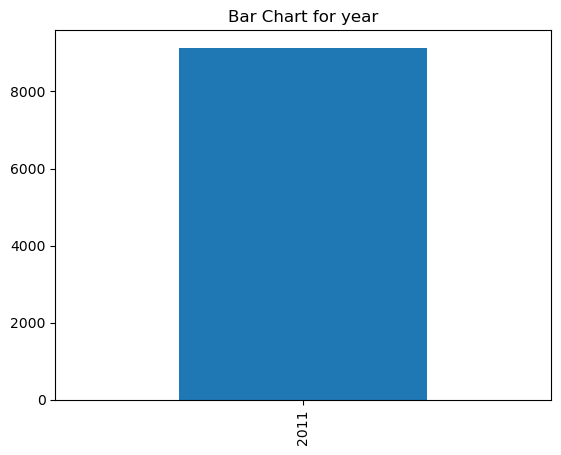

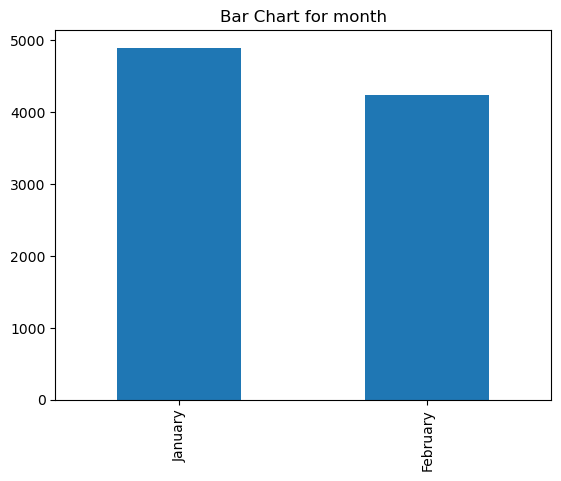

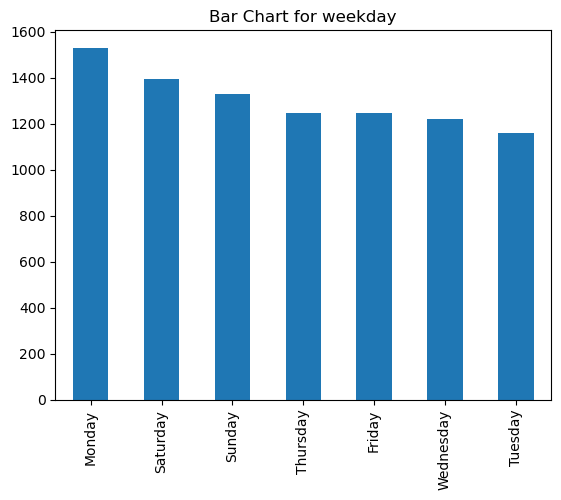

In [15]:
plot(date)